# Chapter 02

In [1]:
import pint
ureg = pint.UnitRegistry()

import numpy as np

from sympy import *
init_printing()

# force plots to display in notebook, not new window
%matplotlib inline

## Probelm 02.38

A process instrument reading, Z(volt) is thought to be related to a process stream flow rate Vflow (L/s) and pressure P (kPa) by the following expression:

$$ Z = aV^bP^c $$

Process data have been obtained in two sets of runs--one with Vflow held constant, the other with P held constant. The data are as follows:

In [2]:
point = [1, 2, 3, 4, 5, 6, 7]
# Vflow in L/s
Vflow = [0.65, 1.02, 1.75, 3.43, 1.02, 1.02, 1.02]
# P in kPa
Pdata = [11.2, 11.2, 11.2, 11.2, 9.1, 7.6, 5.4]
# Z in volts
Zdata = [2.27, 2.58, 3.72, 5.21, 3.50, 4.19, 5.89]

(a) suppose you had only performed runs 2, 3, and 5. Calculate a, b, and c algebraically from the data for these three runs

Convert formula to linear format (y = a*x + b)
$$ Z = a*Vflow^b * P^c $$
$$ \ln Z = \ln (a*Vflow^b * P^c) $$
$$      = c * \ln (P) + \ln (a) + b * \ln (V) $$

Can't use $\ln(a)$ with linear solver, change to $A = \ln(a)$
then all functions will be $1*A$.
After solving for $A$, convert back to $\ln (a)$ using $exp(A)$

In [3]:
# Z = a*Vflow^b * P^c
# ln Z = ln (a*Vflow^b * P^c)
#      = c * ln (P) + ln (a) + b * ln (V)

# ln (2.58) = c * ln (11.2) + A + b * ln (1.02)
# ln (3.72) = c * ln (11.2) + A + b * ln (1.75)
# ln (3.50) = c * ln (9.1)  + A + b * ln (1.02)
system = Matrix(((ln(11.2), 1, ln(1.02), ln(2.58)), 
                 (ln(11.2), 1, ln(1.75), ln(3.72)),
                 (ln(9.10), 1, ln(1.02), ln(3.50))))

In [4]:
# A = ln(a)
A, b, c = symbols('A, b, c')

In [6]:
print(solve_linear_system(system, c, A, b))

{A: 4.48277658965389, b: 0.677890603701089, c: -1.46876566438907}


In [7]:
# A = ln (a)
# exp(A) = a
exp(4.48277658965389).evalf()

a is volts/(kPa*L/s)

b and c are unitless

(b) Now use a grpahical method and all the data to calculate a, b, and c. Comment on why you would have more confidence in this result than in that of part (a). (Hint, you will need at least two plots).

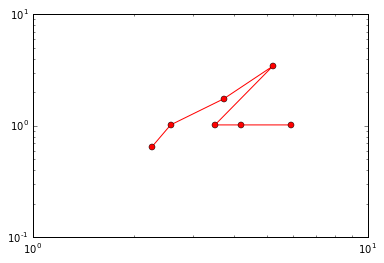

In [20]:
import matplotlib.pyplot as plt

# plot ln Z vs ln V (P constant)
plt.loglog(Zdata, Vflow, 'ro-')

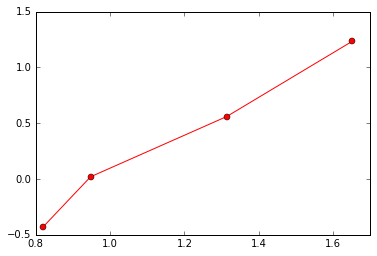

In [19]:
# use data where Z is increasing only (0-3)
newZdata = [ln(Zdata[0]), ln(Zdata[1]), ln(Zdata[2]), ln(Zdata[3])]
newVdata = [ln(Vflow[0]), ln(Vflow[1]), ln(Vflow[2]), ln(Vflow[3])]
plt.plot(newZdata, newVdata, 'ro-')

Function is
$$ \ln Z = b * \ln V + (\ln a + c \ln P) $$

with P constant, b is the slope and $ \ln a + c \ln P $ is the intercept

In [34]:
y2 = ln(Zdata[3]).evalf()
x2 = ln(Vflow[3]).evalf()
y1 = ln(Zdata[0]).evalf()
x1 = ln(Vflow[0]).evalf()
m = (y2 - y1)/(x2 - x1)
b = y2 - m * x2
y = Function('y')
x = symbols('x')
y = m * x + b
y

Slope here is $b = 0.499$ and intercept is $\ln a + c \ln P = 1.035$

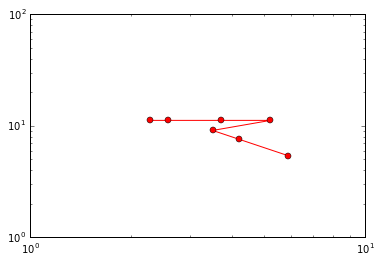

In [22]:
# do the same for ln Z vs ln P (V constant)
plt.loglog(Zdata, Pdata, 'ro-')

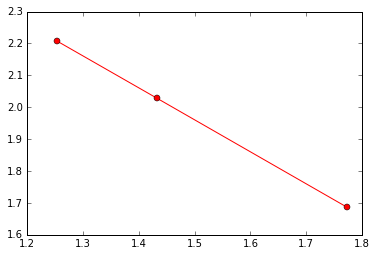

In [27]:
# use data when P is not repeated (4-6)
newZdata = [ln(Zdata[4]), ln(Zdata[5]), ln(Zdata[6])]
newPdata = [ln(Pdata[4]), ln(Pdata[5]), ln(Pdata[6])]
plt.plot(newZdata, newPdata, 'ro-')

Function is
$$ \ln Z = (b * \ln V + \ln a) + c \ln P $$

with V constant, c is the slope and $ \ln a + b \ln V $ is the intercept

In [35]:
y2 = ln(Zdata[6]).evalf()
x2 = ln(Pdata[6]).evalf()
y1 = ln(Zdata[4]).evalf()
x1 = ln(Pdata[4]).evalf()
m = (y2 - y1)/(x2 - x1)
b = y2 - m * x2
y = Function('y')
x = symbols('x')
y = m * x + b
y

Slope here is $c = -1.0$ and intercept is $\ln a + b \ln V = 3.4551$

In [38]:
# Z = a*V^b*P^c
y2 = Zdata[6]
x2 = (Pdata[6]**-1)*(Vflow[6]**0.499)
y1 = Zdata[4]
x1 = (Pdata[4]**-1)*(Vflow[4]**0.499)
m = (y2 - y1)/(x2 - x1)

y = Function('y')
x = symbols('x')
y = m * x
y

Slope here is $a = 31.4$ with units volt * kPa/(L/s)

$$ a = 31.4 $$
$$ b = 0.499 $$
$$ c = -1.0 $$

I am unsure why this is better than answers in part (a)

In [42]:
# try a nonlinear solver
a, b, c = symbols('a b c')
f1 = (Pdata[6]**c)*(Vflow[6]**b)*a - Zdata[6]
f2 = (Pdata[4]**c)*(Vflow[4]**b)*a - Zdata[4]
f3 = (Pdata[0]**c)*(Vflow[0]**b)*a - Zdata[0]
print(nsolve((f1, f2, f3), (a, b, c), (30, 0.5, -0.5)))

[  31.3514340174977]
[ 0.501333887269282]
[-0.997351033166852]


The nonlinear solver seems to have answers closer to the answers in part (b) so it is true that part (b) is a better method.